In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-wind-data/solete_vedic_timestamps1.csv


In [12]:
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, time
from plotly.subplots import make_subplots
from sklearn.metrics import r2_score

In [13]:
df=pd.read_csv('/kaggle/input/new-wind-data/solete_vedic_timestamps1.csv')
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'])
df

time  temperature  humidity     speed   direction  GHI.kW1m2.  \
0      00:00:00    14.344812  0.700000  1.373274  104.091464    0.000000   
1      00:30:00    13.985722  0.700000  1.239333  115.223889    0.000000   
2      01:00:00    13.605000  0.700000  1.080222  128.173889    0.000000   
3      01:30:00    13.179556  0.700000  0.956611  106.148889    0.000000   
4      02:00:00    13.032222  0.702556  1.057111  101.012778    0.000419   
...         ...          ...       ...       ...         ...         ...   
21932  22:00:00    21.725667  0.800000  4.336000  137.013333    0.000000   
21933  22:30:00    21.283556  0.787056  3.383389  132.051111    0.000000   
21934  23:00:00    21.167944  0.798889  1.713333  181.826111    0.000000   
21935  23:30:00    20.437056  0.800000  1.444389  107.600556    0.000000   
21936  00:00:00     0.000000  0.000000  0.000000    0.000000    0.000000   

       POA.Irr.kW1m2.     power  P_Solar.kW.  Pressure.mbar.  Azimuth.deg.  \
0            0.000000  0.014898     0.000000     1017.523328           0.0   
1            0.000000  0.060490     0.000000     1017.423508           0.0   
2            0.000000  0.019394     0.000000     1017.306661           0.0   
3            0.000000  0.000000     0.000000     1017.141220           0.0   
4            0.001006  0.000000     0.007757     1017.049992           0.0   
...               ...       ...          ...             ...           ...   
21932        0.000000  3.685572     0.000000     1007.368001           0.0   
21933        0.000000  0.778359     0.000000     1007.039331           0.0   
21934        0.000000  0.700489     0.000000     1006.279829           0.0   
21935        0.000000  0.000000     0.000000     1005.730446           0.0   
21936        0.000000  0.000000     0.000000     1000.000000           0.0   

       Elevation.deg.  year  month  day  julian_day  \
0                 0.0  2018      6    1   2458270.5   
1                 0.0  2018      6    1   2458270.5   
2                 0.0  2018      6    1   2458270.5   
3                 0.0  2018      6    1   2458270.5   
4                 0.0  2018      6    1   2458270.5   
...               ...   ...    ...  ...         ...   
21932             0.0  2019      8   31   2458726.5   
21933             0.0  2019      8   31   2458726.5   
21934             0.0  2019      8   31   2458726.5   
21935             0.0  2019      8   31   2458726.5   
21936             0.0  2019      9    1   2458727.5   

                             tithi       date            datetime  
0                   18, 21, 14, 48 2018-06-01 2018-06-01 00:00:00  
1                   18, 21, 14, 48 2018-06-01 2018-06-01 00:30:00  
2                   18, 21, 14, 48 2018-06-01 2018-06-01 01:00:00  
3                   18, 21, 14, 48 2018-06-01 2018-06-01 01:30:00  
4                   18, 21, 14, 48 2018-06-01 2018-06-01 02:00:00  
...                            ...        ...                 ...  
21932  1, 7, 43, 48, 2, 27, 56, 40 2019-08-31 2019-08-31 22:00:00  
21933  1, 7, 43, 48, 2, 27, 56, 40 2019-08-31 2019-08-31 22:30:00  
21934  1, 7, 43, 48, 2, 27, 56, 40 2019-08-31 2019-08-31 23:00:00  
21935  1, 7, 43, 48, 2, 27, 56, 40 2019-08-31 2019-08-31 23:30:00  
21936                3, 24, 26, 37 2019-09-01 2019-09-01 00:00:00  

[21937 rows x 19 columns]

In [14]:
df=df[['datetime','power','speed','temperature','humidity','direction']]
df=df.copy()
df

datetime     power     speed  temperature  humidity  \
0     2018-06-01 00:00:00  0.014898  1.373274    14.344812  0.700000   
1     2018-06-01 00:30:00  0.060490  1.239333    13.985722  0.700000   
2     2018-06-01 01:00:00  0.019394  1.080222    13.605000  0.700000   
3     2018-06-01 01:30:00  0.000000  0.956611    13.179556  0.700000   
4     2018-06-01 02:00:00  0.000000  1.057111    13.032222  0.702556   
...                   ...       ...       ...          ...       ...   
21932 2019-08-31 22:00:00  3.685572  4.336000    21.725667  0.800000   
21933 2019-08-31 22:30:00  0.778359  3.383389    21.283556  0.787056   
21934 2019-08-31 23:00:00  0.700489  1.713333    21.167944  0.798889   
21935 2019-08-31 23:30:00  0.000000  1.444389    20.437056  0.800000   
21936 2019-09-01 00:00:00  0.000000  0.000000     0.000000  0.000000   

        direction  
0      104.091464  
1      115.223889  
2      128.173889  
3      106.148889  
4      101.012778  
...           ...  
21932  137.013333  
21933  132.051111  
21934  181.826111  
21935  107.600556  
21936    0.000000  

[21937 rows x 6 columns]

In [15]:
fig = px.line(df, x='datetime', y='power', title='Power vs Datetime')
fig.show()

In [16]:
df = df.loc[(df['datetime'] >= '2018-08-01 00:00:00') & (df['datetime'] < '2019-05-30 00:00:00')].copy()
df.reset_index(drop=True, inplace=True)
df

datetime  power     speed  temperature  humidity   direction
0     2018-08-01 00:00:00    0.0  0.713889    20.731500  1.000000   81.075556
1     2018-08-01 00:30:00    0.0  0.500000    19.975556  0.981944   71.000000
2     2018-08-01 01:00:00    0.0  0.824611    20.230833  1.000000  248.811111
3     2018-08-01 01:30:00    0.0  1.578833    19.799889  0.998333  257.235556
4     2018-08-01 02:00:00    0.0  2.122778    20.343833  0.931111  285.979444
...                   ...    ...       ...          ...       ...         ...
14491 2019-05-29 21:30:00    0.0  2.714056     8.714389  0.700000  185.728333
14492 2019-05-29 22:00:00    0.0  2.574611     8.314944  0.745444  181.709444
14493 2019-05-29 22:30:00    0.0  2.416722     7.769111  0.774167  170.738333
14494 2019-05-29 23:00:00    0.0  2.728944     7.138944  0.767556  168.167222
14495 2019-05-29 23:30:00    0.0  2.530667     7.071444  0.726556  172.057222

[14496 rows x 6 columns]

In [17]:
# Replace values in 'power' column
median_power = df['power'].mean()
df['power'] = np.where((df['power'] > 11.5), 0, df['power'])
zero_power_indices = df[df['power'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['power'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'power'] = neighbor_mean


# Replace values in 'speed' column
median_speed = df['speed'].mean()
df['speed'] = np.where((df['speed'] > 14) | (df['speed'] < 0.25), 0, df['speed'])
zero_power_indices = df[df['speed'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['speed'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'speed'] = neighbor_mean
    

# Replace values in 'temperature' column
median_temperature = df['temperature'].mean()
df['temperature'] = np.where((df['temperature'] > 30), 0, df['temperature'])
zero_power_indices = df[df['temperature'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['temperature'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'temperature'] = neighbor_mean


# Replace values in 'humidity' column
median_humidity = df['humidity'].mean()
df['humidity'] = np.where((df['humidity'] > 1.06) | (df['humidity'] < 0.3), 0, df['humidity'])
zero_power_indices = df[df['humidity'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['humidity'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'humidity'] = neighbor_mean


# Replace values in 'direction' column
median_direction = df['direction'].mean()
df['direction'] = np.where((df['direction'] > 320) | (df['direction'] < 50), 0, df['direction'])
zero_power_indices = df[df['direction'] == 0].index
for i in zero_power_indices:
    neighbor_mean = df['direction'].iloc[max(0, i - 5): min(len(df), i + 6)].mean()
    df.at[i, 'direction'] = neighbor_mean

In [18]:
from datetime import time

In [19]:
df['datetime']=pd.to_datetime(df['datetime'])
df= df[df['datetime'].dt.time == time(10, 0)]
df.set_index('datetime', inplace=True) 

In [20]:
df

power     speed  temperature  humidity   direction
datetime                                                                  
2018-08-01 10:00:00  0.359826  2.318889    22.284167  0.800000  271.958889
2018-08-02 10:00:00  0.465304  1.859889    25.592056  0.500000  275.720556
2018-08-03 10:00:00  1.095733  2.963000    27.254833  0.400000  278.100000
2018-08-04 10:00:00  6.025798  4.963778    23.010222  0.663389  296.547778
2018-08-05 10:00:00  9.848607  7.955000    20.333389  0.600000  294.502222
...                       ...       ...          ...       ...         ...
2019-05-25 10:00:00  4.226976  3.982000    14.373500  0.693000  269.530556
2019-05-26 10:00:00  7.815668  5.501889    12.300889  0.900000  250.393889
2019-05-27 10:00:00  9.206921  5.975444    14.416389  0.658167  268.621111
2019-05-28 10:00:00  4.742407  5.047000    11.010722  0.600000  285.598889
2019-05-29 10:00:00  1.741987  5.744667    11.317444  0.512444  292.287778

[302 rows x 5 columns]

In [21]:
len(df)

302

In [22]:
fig = px.line(df, x=df.index, y='power', title='Power vs Datetime')
fig.show()

In [23]:
!pip install vmdpy

In [24]:
import vmdpy
from scipy.stats import pearsonr

In [25]:
def ivmd(signal, kmax,alpha, tau, DC, init, tol):
    """
    Performs VMD decomposition on the given signal for different K values and calculates the average correlation coefficient for each K value.

    Args:
        signal: The signal to be decomposed.
        kmax: The maximum K value.

    Returns:
        The K value with the least average correlation coefficient.
    """

    # Perform VMD decomposition for different K values
    imfs = []
    for k in range(3, kmax + 1):
        imfs_k,z,v = vmdpy.VMD(signal, alpha, tau, k, DC, init, tol)
        imfs.append(imfs_k)

    # Calculate the correlation coefficients between adjacent IMFs for each K value
    correlation_coefficients = []
    for k in range(3, kmax + 1):
        correlation_coefficient_df = []
        for j in range(len(imfs[k - 3])-1):
            correlation_coefficient, _ = pearsonr(imfs[k-3][:, j], imfs[k-3][:, j+1])
            correlation_coefficient_df.append(correlation_coefficient)
        correlation_coefficients.append(correlation_coefficient_df)

    # Calculate the average correlation coefficient for each K value
    # average_correlation_coefficients = []
    # for k in range(3, kmax):
    #     average_correlation_coefficient = correlation_coefficients[k - 3].sum()/correlation_coefficient[k-3].count()
    #     average_correlation_coefficients.append(average_correlation_coefficient)

    average_correlation_coefficients = []
    for correlation_coefficient_df in correlation_coefficients:
        average_correlation_coefficient = sum(correlation_coefficient_df) / len(correlation_coefficient_df)
        average_correlation_coefficients.append(average_correlation_coefficient)
    # Find the K value with the least average correlation coefficient
    # optimal_k = np.argmin(average_correlation_coefficients) + 3
    print(average_correlation_coefficients)
    optimal_k = average_correlation_coefficients.index(min(average_correlation_coefficients))+3

    return optimal_k

In [26]:
alpha = 500       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence


#. Run VMD
f = df["power"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)


[0.6665915004852412, 0.7848858013049665, 0.7012790258624322, 0.7153421935734954, 0.7277543497242074, 0.6393049675350545, 0.5923680794008832, 0.5811231768116405]
10


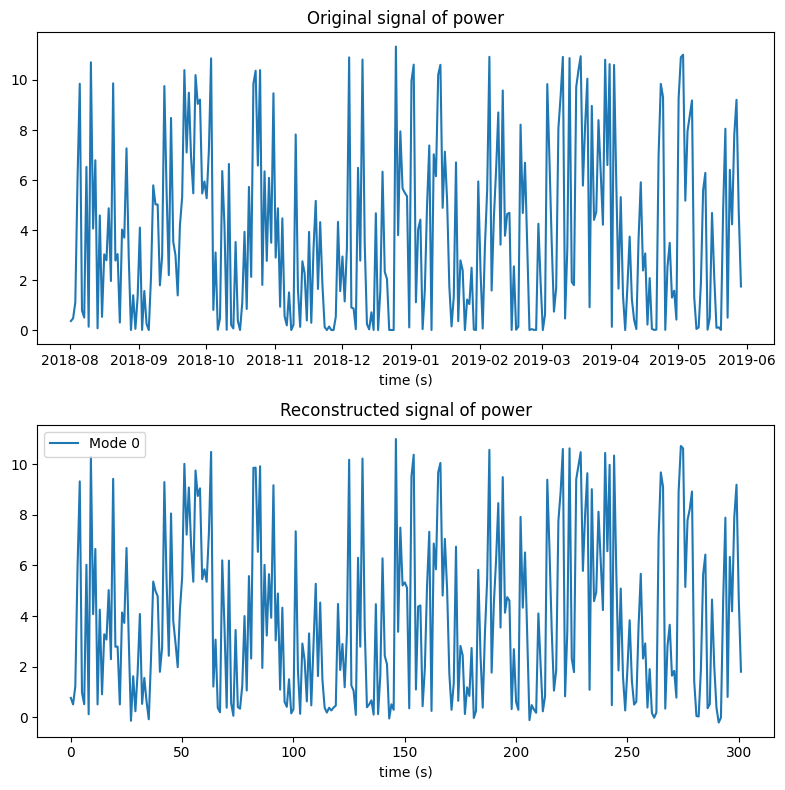

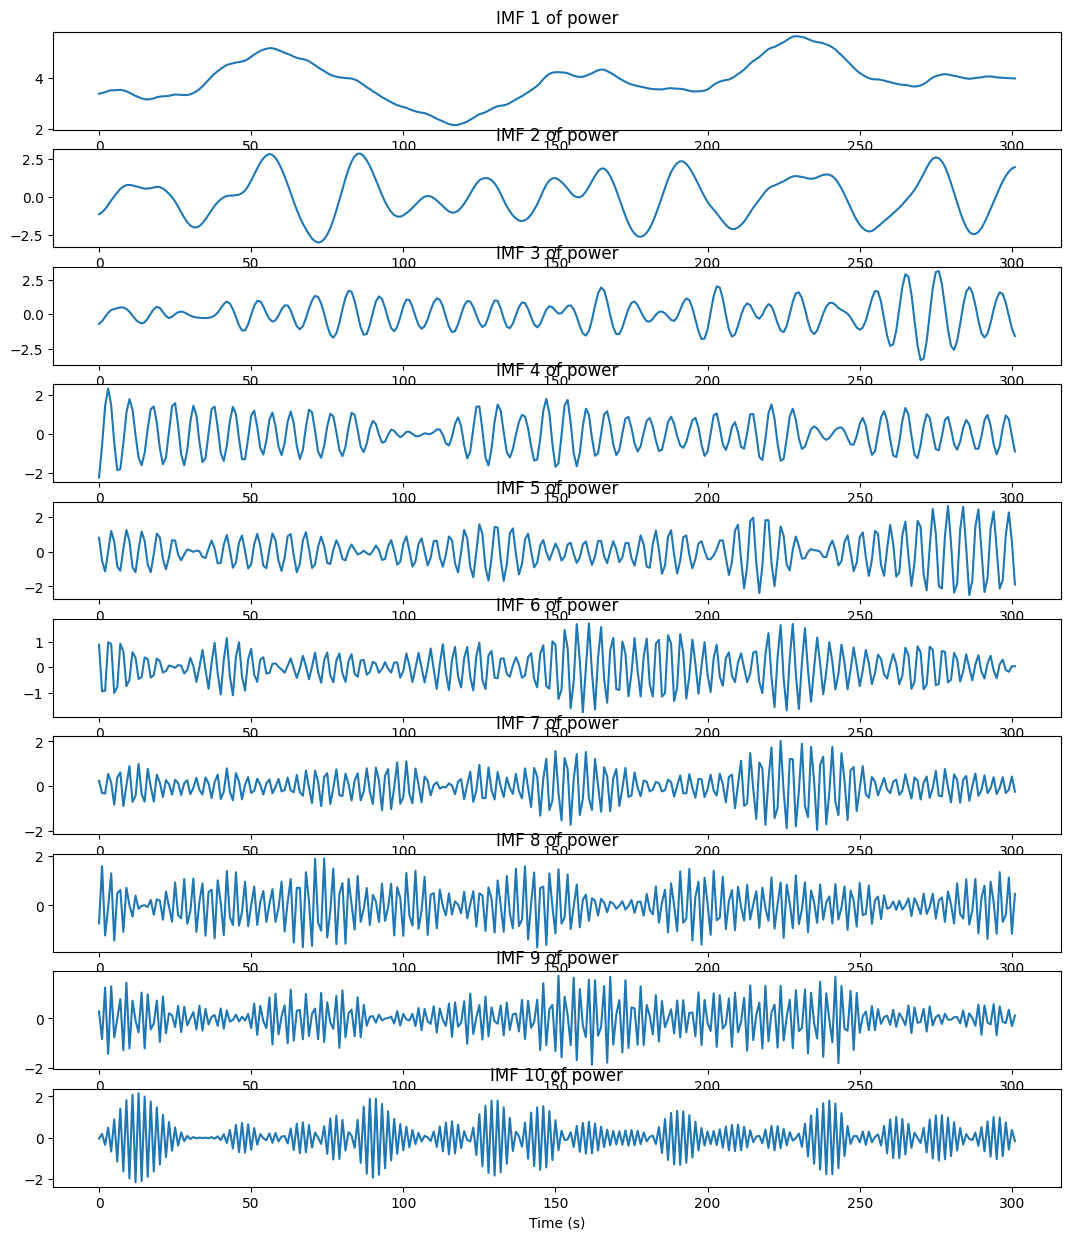

In [27]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)


imfsdata = pd.DataFrame(u)
datap = imfsdata.T
datap.index = df.index
datap["power"] = df["power"]


recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of power')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of power')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()


plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of power'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [28]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.2658446592690242


In [29]:
datap

0         1         2         3         4  \
datetime                                                                
2018-08-01 10:00:00  3.366706 -1.119866 -0.694862 -2.240723  0.822384   
2018-08-02 10:00:00  3.393252 -0.997653 -0.494654 -0.593957 -0.509432   
2018-08-03 10:00:00  3.429818 -0.785913 -0.192743  1.434706 -1.128587   
2018-08-04 10:00:00  3.471817 -0.511779  0.109323  2.347702  0.005765   
2018-08-05 10:00:00  3.505158 -0.218236  0.316837  1.493736  1.209154   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00  3.991505  1.030420  1.472308  0.314707 -1.624307   
2019-05-26 10:00:00  3.982420  1.389275  0.826655  0.963142  0.972896   
2019-05-27 10:00:00  3.976650  1.675183 -0.112649  0.768455  2.283886   
2019-05-28 10:00:00  3.972689  1.872710 -1.020707 -0.100604  0.599678   
2019-05-29 10:00:00  3.965264  1.966813 -1.585053 -0.894683 -1.886533   

                            5         6         7         8         9  \
datetime                                                                
2018-08-01 10:00:00  0.879254  0.245692 -0.733255  0.285221 -0.040155   
2018-08-02 10:00:00 -0.931372 -0.298386  1.595703 -0.836993  0.186785   
2018-08-03 10:00:00 -0.909705 -0.317887 -1.219515  1.251804 -0.338502   
2018-08-04 10:00:00  0.975452  0.554270 -0.094842 -1.435787  0.493077   
2018-08-05 10:00:00  0.912090  0.165658  1.303988  1.296682 -0.661388   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00  0.301437  0.404464 -0.670425 -0.142644 -0.886362   
2019-05-26 10:00:00 -0.102883 -0.298252 -0.387632 -0.183987  0.745260   
2019-05-27 10:00:00 -0.169984 -0.142934  1.136626  0.351135 -0.575121   
2019-05-28 10:00:00  0.049249  0.433944 -1.152016 -0.313747  0.378417   
2019-05-29 10:00:00  0.041118 -0.237651  0.473351  0.119963 -0.158874   

                        power  
datetime                       
2018-08-01 10:00:00  0.359826  
2018-08-02 10:00:00  0.465304  
2018-08-03 10:00:00  1.095733  
2018-08-04 10:00:00  6.025798  
2018-08-05 10:00:00  9.848607  
...                       ...  
2019-05-25 10:00:00  4.226976  
2019-05-26 10:00:00  7.815668  
2019-05-27 10:00:00  9.206921  
2019-05-28 10:00:00  4.742407  
2019-05-29 10:00:00  1.741987  

[302 rows x 11 columns]

In [30]:
alpha = 2000       # moderate bandwidth constraint
tau = 1            # noise-tolerance (no strict fidelity enforcement)
K = 10              # 3 modes
DC = 0             # no DC part imposed
init = 1           # initialize omegas uniformly
tol = 1e-7

#. Run VMD
f = df["speed"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)

print(lastk)

[0.5606584920780345, 0.9173505722112766, 0.7063872747557428, 0.8716256823441488, 0.8831623566557941, 0.8311102993380252, 0.829666329960631, 0.8218527797133869]
3


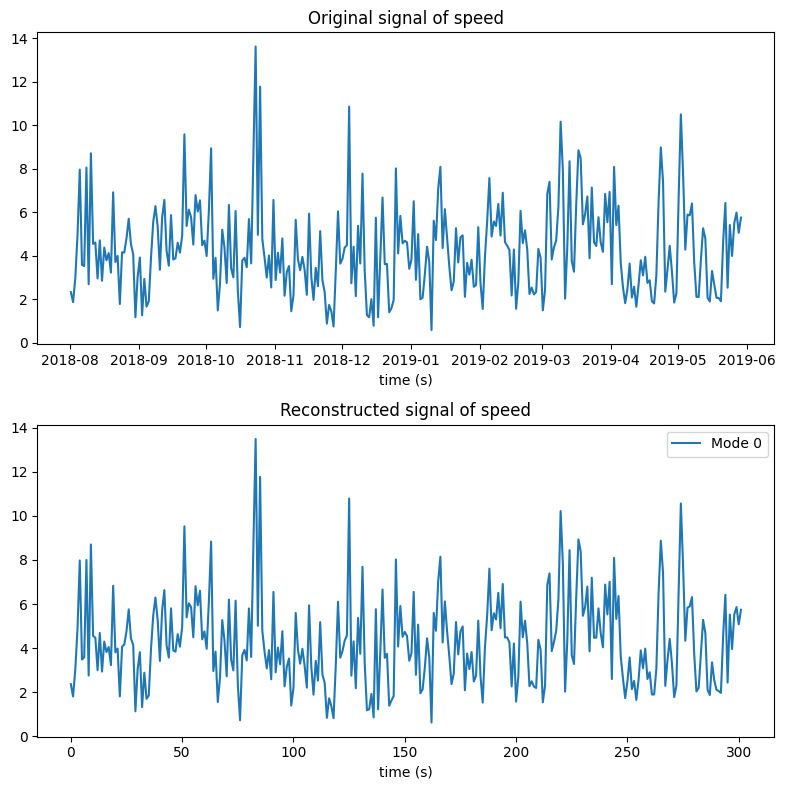

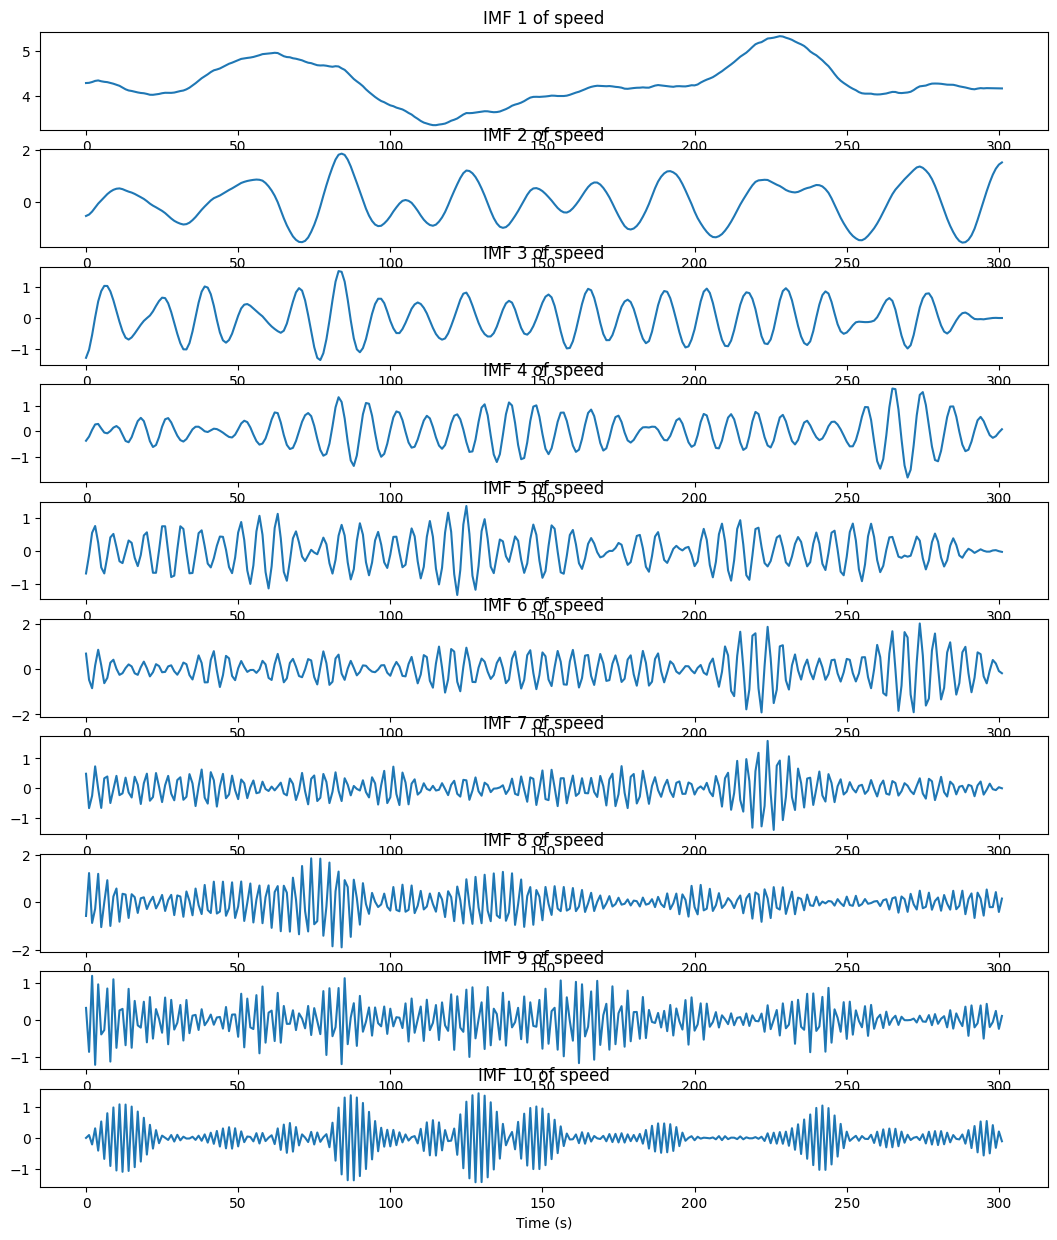

In [31]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datas = imfsdata.T
datas.index = df.index
datas["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of speed')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of speed')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of speed'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [32]:
datas

0         1         2         3         4  \
datetime                                                                
2018-08-01 10:00:00  4.292016 -0.523433 -1.274557 -0.365081 -0.681802   
2018-08-02 10:00:00  4.296229 -0.469430 -1.015895 -0.202294 -0.125134   
2018-08-03 10:00:00  4.314023 -0.355473 -0.541760  0.059038  0.556333   
2018-08-04 10:00:00  4.338920 -0.201625  0.030052  0.271632  0.761385   
2018-08-05 10:00:00  4.349247 -0.050538  0.539330  0.289938  0.252788   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00  4.178080  0.762921 -0.007144 -0.149836 -0.016609   
2019-05-26 10:00:00  4.179303  1.057623  0.006905 -0.251111  0.018424   
2019-05-27 10:00:00  4.177161  1.288486  0.010569 -0.187315  0.027228   
2019-05-28 10:00:00  4.172663  1.445007  0.005676 -0.039553 -0.003881   
2019-05-29 10:00:00  4.172713  1.528041  0.006049  0.083629 -0.025120   

                            5         6         7         8         9  \
datetime                                                                
2018-08-01 10:00:00  0.685093  0.485385 -0.574853  0.319431  0.002713   
2018-08-02 10:00:00 -0.472739 -0.665808  1.242050 -0.871204  0.095405   
2018-08-03 10:00:00 -0.843795 -0.253316 -0.871832  1.187682 -0.206108   
2018-08-04 10:00:00  0.162814  0.733054 -0.274110 -1.221011  0.309037   
2018-08-05 10:00:00  0.855436 -0.018413  1.209272  0.957309 -0.403390   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00 -0.066334  0.153409 -0.201867 -0.198108 -0.491507   
2019-05-26 10:00:00  0.403560 -0.031375 -0.200943 -0.063691  0.412572   
2019-05-27 10:00:00  0.248989 -0.062309  0.436297  0.238431 -0.313928   
2019-05-28 10:00:00 -0.084008  0.034212 -0.407244 -0.248058  0.208422   
2019-05-29 10:00:00 -0.181147 -0.001737  0.161072  0.101353 -0.103835   

                        power  
datetime                       
2018-08-01 10:00:00  0.359826  
2018-08-02 10:00:00  0.465304  
2018-08-03 10:00:00  1.095733  
2018-08-04 10:00:00  6.025798  
2018-08-05 10:00:00  9.848607  
...                       ...  
2019-05-25 10:00:00  4.226976  
2019-05-26 10:00:00  7.815668  
2019-05-27 10:00:00  9.206921  
2019-05-28 10:00:00  4.742407  
2019-05-29 10:00:00  1.741987  

[302 rows x 11 columns]

In [33]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())


if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]

print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.06663838226963746


In [34]:
alpha = 2000       # moderate bandwidth constraint
tau = 1           # noise-tolerance (no strict fidelity enforcement)
K = 3              # 3 modes
DC = 0             # no DC part imposed
init = 1           # initialize omegas uniformly
tol = 1e-7

#. Run VMD
f = df["temperature"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.9922478201017728, 0.9273002675391567, 0.9426807401925223, 0.9665733940890842, 0.932901289365105, 0.9560864760287221, 0.9638698175336409, 0.9666452884464627]
4


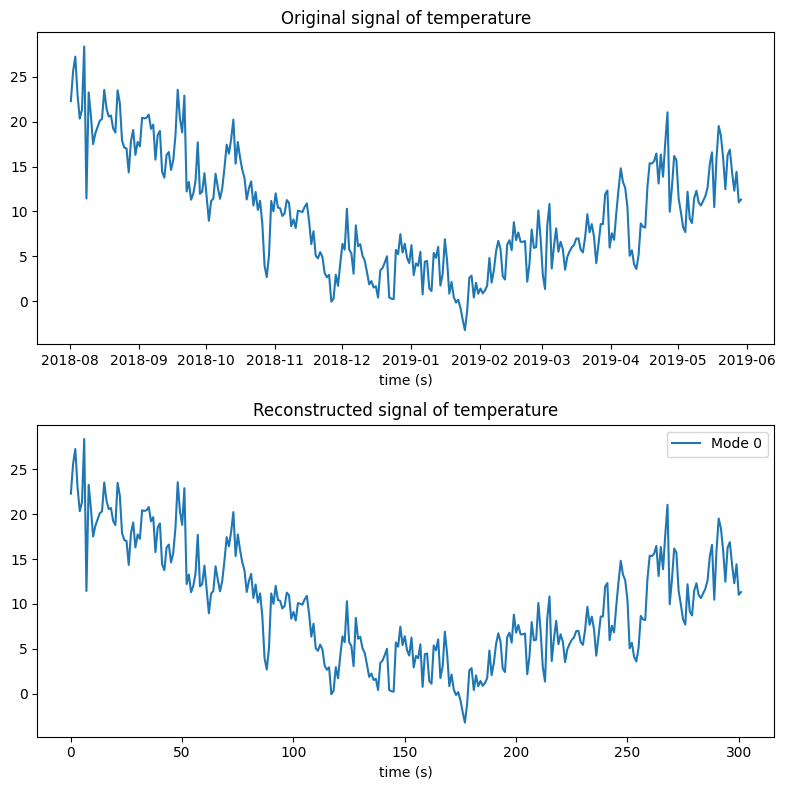

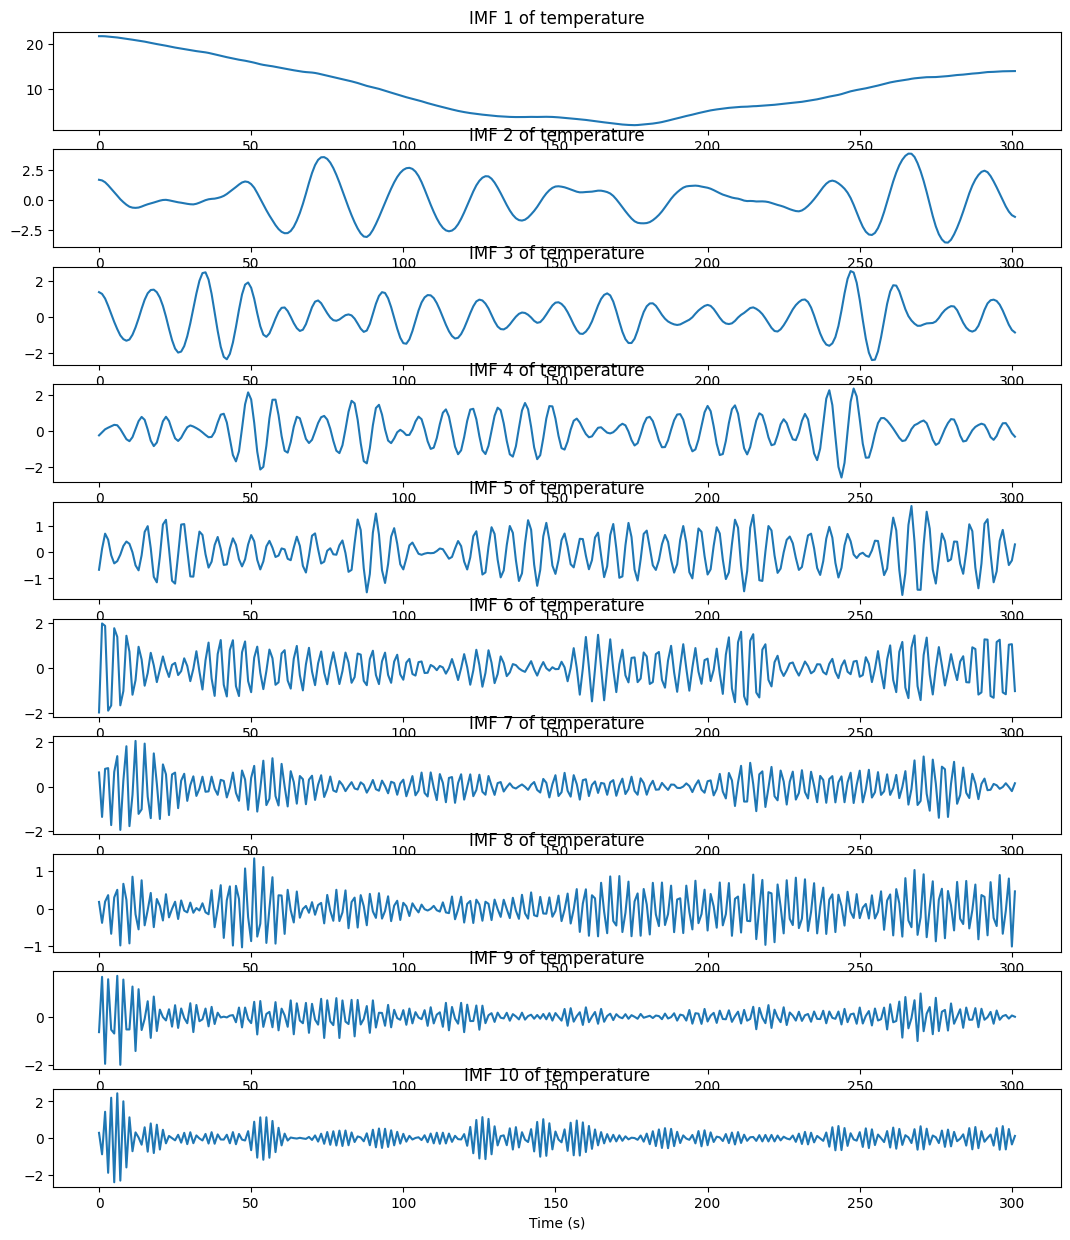

In [35]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)


imfsdata = pd.DataFrame(u)
datat = imfsdata.T
datat.index = df.index
datat["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of temperature')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of temperature')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of temperature'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [36]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.0007324622747552366


In [37]:
datat

0         1         2         3         4  \
datetime                                                                 
2018-08-01 10:00:00  21.697785  1.651149  1.363155 -0.258677 -0.669483   
2018-08-02 10:00:00  21.703709  1.598659  1.265219 -0.088885  0.123310   
2018-08-03 10:00:00  21.677215  1.445326  1.007810  0.077418  0.698977   
2018-08-04 10:00:00  21.613822  1.194669  0.603251  0.167234  0.470930   
2018-08-05 10:00:00  21.545898  0.907196  0.147405  0.249115 -0.116915   
...                        ...       ...       ...       ...       ...   
2019-05-25 10:00:00  13.921709 -0.055840  0.337729  0.411842  0.842191   
2019-05-26 10:00:00  13.936317 -0.570543 -0.063434  0.421234  0.186418   
2019-05-27 10:00:00  13.945819 -0.999554 -0.449306  0.176555 -0.491032   
2019-05-28 10:00:00  13.955385 -1.299922 -0.740307 -0.142300 -0.317554   
2019-05-29 10:00:00  13.972206 -1.439946 -0.878053 -0.331126  0.291653   

                            5         6         7         8         9  \
datetime                                                                
2018-08-01 10:00:00 -1.962214  0.633798  0.177538 -0.639214  0.291107   
2018-08-02 10:00:00  1.978285 -1.371506 -0.376711  1.634303 -0.875039   
2018-08-03 10:00:00  1.870943  0.797486  0.186213 -1.943155  1.437294   
2018-08-04 10:00:00 -1.883947  0.830180  0.357332  1.535875 -1.879948   
2018-08-05 10:00:00 -1.653704 -1.740262 -0.665807 -0.538609  2.199741   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00 -1.073235 -0.021801 -0.664971  0.019522  0.655711   
2019-05-26 10:00:00 -1.156433  0.148199 -0.057123  0.065610 -0.608695   
2019-05-27 10:00:00  1.038392 -0.019378  0.797576 -0.083562  0.500013   
2019-05-28 10:00:00  1.060194 -0.207669 -1.003788  0.045659 -0.338273   
2019-05-29 10:00:00 -1.017485  0.147303  0.457430 -0.008012  0.122851   

                        power  
datetime                       
2018-08-01 10:00:00  0.359826  
2018-08-02 10:00:00  0.465304  
2018-08-03 10:00:00  1.095733  
2018-08-04 10:00:00  6.025798  
2018-08-05 10:00:00  9.848607  
...                       ...  
2019-05-25 10:00:00  4.226976  
2019-05-26 10:00:00  7.815668  
2019-05-27 10:00:00  9.206921  
2019-05-28 10:00:00  4.742407  
2019-05-29 10:00:00  1.741987  

[302 rows x 11 columns]

In [38]:
alpha = 550       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence

#. Run VMD
f = df["humidity"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.9843351139928453, 0.9723234678430007, 0.9644913733920043, 0.9700239414285738, 0.9765274821921476, 0.9818205764435094, 0.9820548371094344, 0.9803690381902318]
5


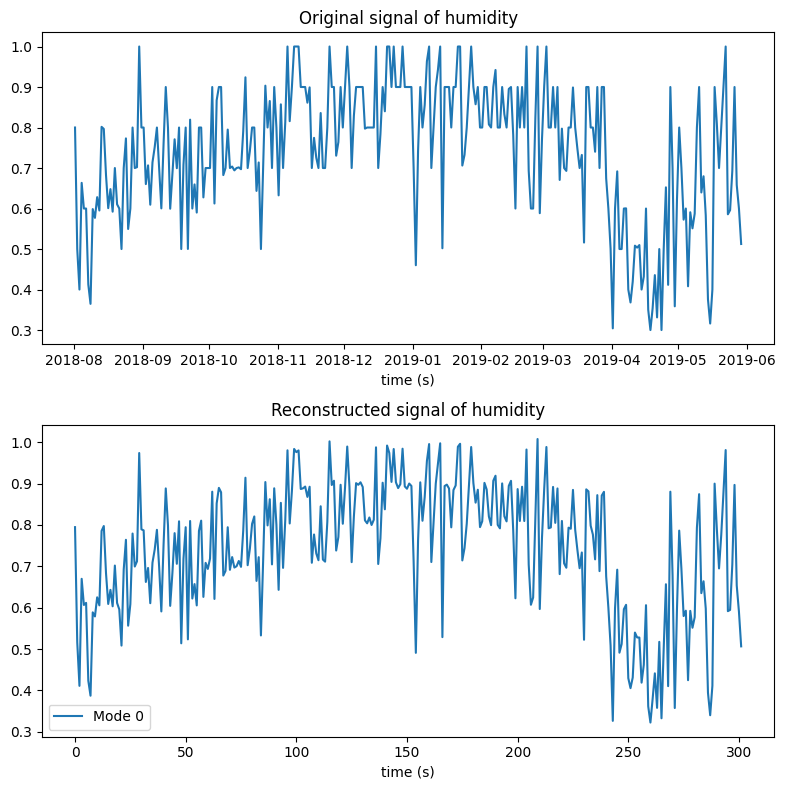

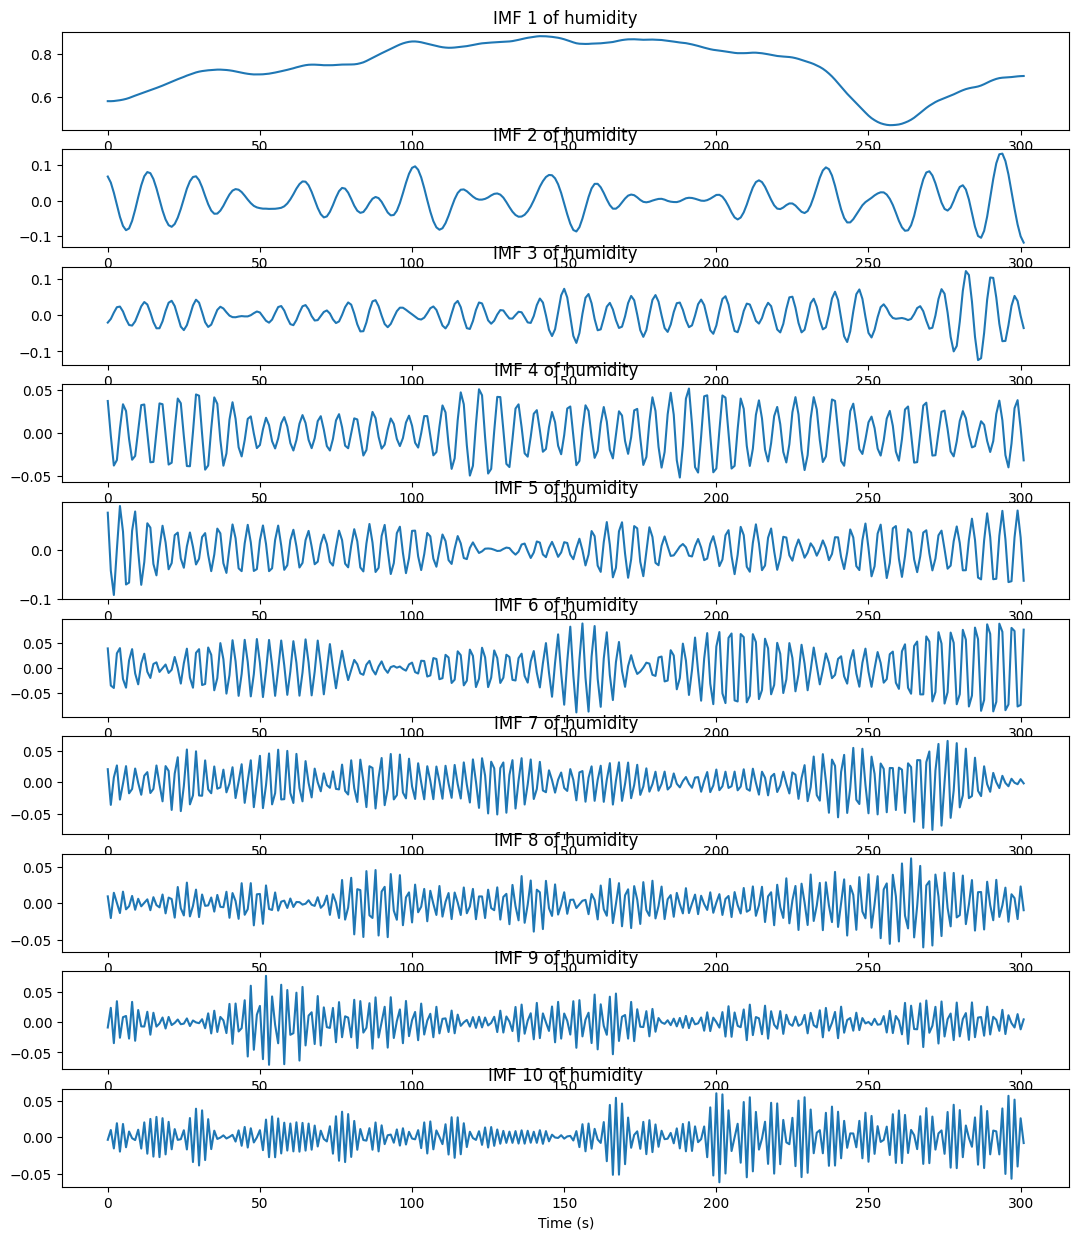

In [39]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datah = imfsdata.T
datah.index = df.index
datah["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of humidity')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of humidity')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of humidity'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [40]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 0.012636798530934147


In [41]:
datah

0         1         2         3         4  \
datetime                                                                
2018-08-01 10:00:00  0.579541  0.068108 -0.020737  0.036779  0.074758   
2018-08-02 10:00:00  0.579404  0.051006 -0.010720 -0.003401 -0.042377   
2018-08-03 10:00:00  0.580165  0.022058  0.006626 -0.037970 -0.091686   
2018-08-04 10:00:00  0.581836 -0.012582  0.021534 -0.031619  0.001101   
2018-08-05 10:00:00  0.583904 -0.046497  0.023254  0.005002  0.088295   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00  0.691075  0.025943  0.025194 -0.012437 -0.063818   
2019-05-26 10:00:00  0.692690 -0.023714  0.052488  0.028466  0.025009   
2019-05-27 10:00:00  0.694276 -0.068171  0.038532  0.037767  0.079202   
2019-05-28 10:00:00  0.695389 -0.101711 -0.002053  0.005334  0.024689   
2019-05-29 10:00:00  0.695948 -0.119747 -0.035733 -0.031959 -0.062887   

                            5         6         7         8         9  \
datetime                                                                
2018-08-01 10:00:00  0.038376  0.020607  0.009439 -0.008604 -0.003737   
2018-08-02 10:00:00 -0.035000 -0.035944 -0.020195  0.024025  0.009688   
2018-08-03 10:00:00 -0.039848  0.007470  0.014367 -0.034553 -0.015562   
2018-08-04 10:00:00  0.028644  0.026498  0.000309  0.035019  0.018961   
2018-08-05 10:00:00  0.038958 -0.027556 -0.013359 -0.025580 -0.019903   
...                       ...       ...       ...       ...       ...   
2019-05-25 10:00:00  0.078991  0.005391  0.012340 -0.001337 -0.057095   
2019-05-26 10:00:00  0.072806 -0.000857  0.007031 -0.008589  0.051289   
2019-05-27 10:00:00 -0.076520 -0.003197 -0.021591  0.013617 -0.040338   
2019-05-28 10:00:00 -0.073445  0.004763  0.023042 -0.011675  0.025730   
2019-05-29 10:00:00  0.075517 -0.001859 -0.009487  0.004856 -0.008181   

                        power  
datetime                       
2018-08-01 10:00:00  0.359826  
2018-08-02 10:00:00  0.465304  
2018-08-03 10:00:00  1.095733  
2018-08-04 10:00:00  6.025798  
2018-08-05 10:00:00  9.848607  
...                       ...  
2019-05-25 10:00:00  4.226976  
2019-05-26 10:00:00  7.815668  
2019-05-27 10:00:00  9.206921  
2019-05-28 10:00:00  4.742407  
2019-05-29 10:00:00  1.741987  

[302 rows x 11 columns]

In [42]:
alpha = 650       # Adjust based on signal characteristics
tau = 0        # Strict fidelity enforcement
k = 10             # Adjust based on the complexity of the signal
DC = 0          # Include DC part
init = 1           # Initialize omegas uniformly
tol = 1e-7         # Small tolerance for convergence

#. Run VMD
f = df["direction"]
# Perform IVMD decomposition
lastk = ivmd(f, k,alpha, tau,  DC, init, tol)
print(lastk)

[0.9991580075082903, 0.9962579300052784, 0.9921503829215191, 0.9829426473938074, 0.9833511222966106, 0.9813169818299862, 0.9734990427244101, 0.98031006463475]
9


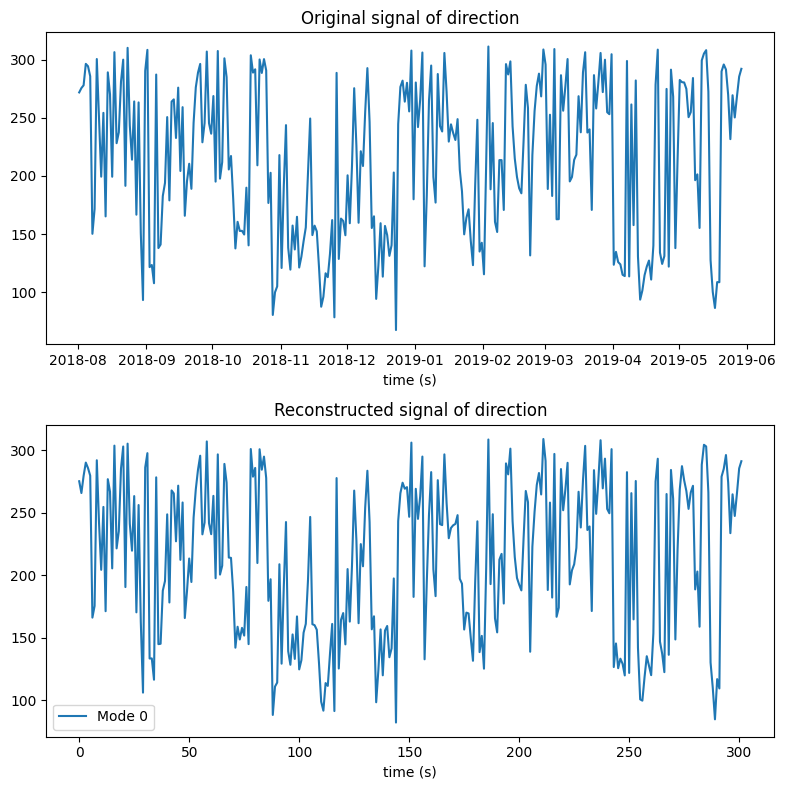

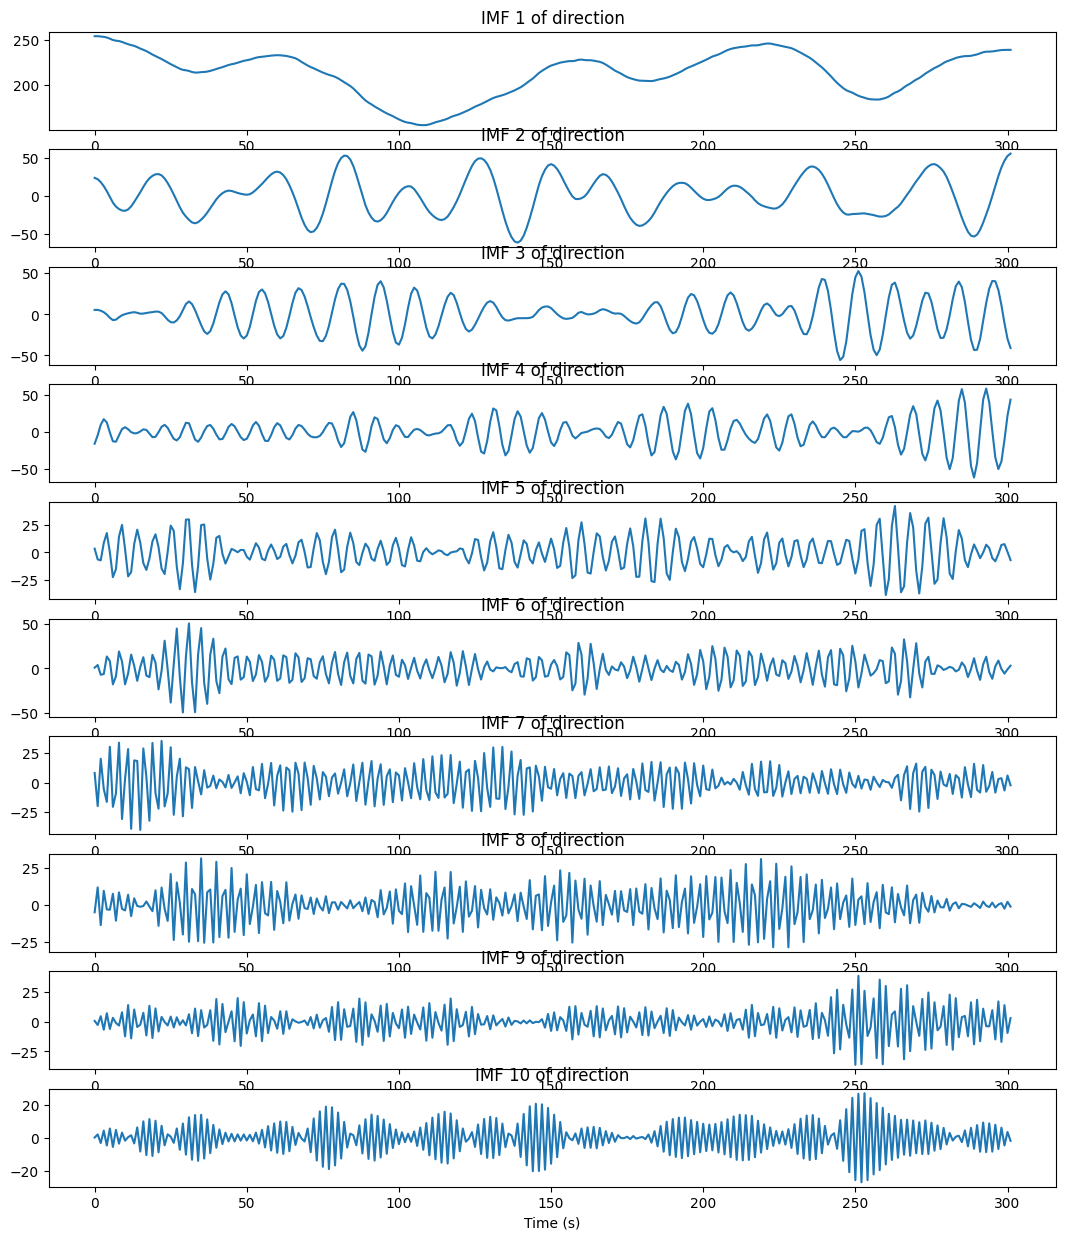

In [43]:
u,z,v = vmdpy.VMD(f, alpha, tau, 10, DC, init, tol)

imfsdata = pd.DataFrame(u)
datad = imfsdata.T
datad.index = df.index
datad["power"] = df["power"]

recon_sig = sum(u)
#. Visualize decomposed modes
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(f[:5000])
plt.title('Original signal of direction')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(recon_sig[:5000])
plt.title('Reconstructed signal of direction')
plt.xlabel('time (s)')
plt.legend(['Mode %d'%m_i for m_i in range(u.shape[0])])
plt.tight_layout()

plt.figure(figsize=(13,15))
imfs=u
num_imfs = len(imfs)
for i in range(num_imfs):
    plt.subplot(num_imfs, 1, i + 1)
    plt.plot(u[i][:5000])
    plt.title('IMF {} of direction'.format(i + 1))
    plt.xlabel('Time (s)')
plt.show()

In [44]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
if len(f) > len(recon_sig):
    f = f[:len(recon_sig)]
else:
    recon_sig = recon_sig[:len(f)]
print('# RMSE GP : ' + str(rmse(recon_sig, f)))

# RMSE GP : 6.8104930821762135


In [45]:
datad

0          1          2          3          4  \
datetime                                                                      
2018-08-01 10:00:00  253.683651  23.667954   5.444911 -15.826975   3.393812   
2018-08-02 10:00:00  253.735687  21.975634   5.500455  -4.321420  -6.387274   
2018-08-03 10:00:00  253.408574  18.166777   4.543463   9.860189  -7.254954   
2018-08-04 10:00:00  252.988482  12.868904   2.730675  17.479606   8.556496   
2018-08-05 10:00:00  252.287807   6.287247  -0.208735  13.085999  17.620504   
...                         ...        ...        ...        ...        ...   
2019-05-25 10:00:00  238.175389  26.073553  29.754744 -50.209346  -1.467313   
2019-05-26 10:00:00  238.575383  37.332355  11.251188 -39.911326   6.784650   
2019-05-27 10:00:00  238.736528  46.199552 -10.576905 -10.732234   7.529653   
2019-05-28 10:00:00  238.793509  52.318644 -29.713640  22.541966   0.434606   
2019-05-29 10:00:00  238.775695  55.399438 -40.892406  44.058769  -7.015024   

                             5          6          7          8         9  \
datetime                                                                    
2018-08-01 10:00:00   0.894274   7.998642  -4.797102   0.839841  0.045160   
2018-08-02 10:00:00   3.845383 -19.786509  12.023757  -2.602778  1.935570   
2018-08-03 10:00:00  -7.050009  19.952895 -13.502101   4.822398 -3.285426   
2018-08-04 10:00:00  -6.212944  -5.418327   9.666921  -6.628038  4.251248   
2018-08-05 10:00:00  13.362413 -16.228565  -2.868521   7.383483 -4.810303   
...                        ...        ...        ...        ...       ...   
2019-05-25 10:00:00   8.811695   2.921017   0.441680  17.335070 -6.953297   
2019-05-26 10:00:00  -0.577005   3.640606   1.363810 -16.937625  6.035385   
2019-05-27 10:00:00  -5.720197  -6.710814  -2.365570  14.200040 -4.781238   
2019-05-28 10:00:00  -0.976364   5.883882   2.255354  -9.344085  3.426012   
2019-05-29 10:00:00   3.069734  -2.304065  -0.956115   3.188149 -1.942192   

                        power  
datetime                       
2018-08-01 10:00:00  0.359826  
2018-08-02 10:00:00  0.465304  
2018-08-03 10:00:00  1.095733  
2018-08-04 10:00:00  6.025798  
2018-08-05 10:00:00  9.848607  
...                       ...  
2019-05-25 10:00:00  4.226976  
2019-05-26 10:00:00  7.815668  
2019-05-27 10:00:00  9.206921  
2019-05-28 10:00:00  4.742407  
2019-05-29 10:00:00  1.741987  

[302 rows x 11 columns]

In [46]:
max_cols = max(len(df.columns) for df in [datas, datap, datat, datah, datad])
max_imfs = max_cols-1
max_imfs

10

In [47]:
!pip install  GPy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 41.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.12.0 which is incompatible.
nilearn 0.11.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.
bigframes 1.36.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
imbalanced-learn 0.13.0 require

In [48]:
import GPy

In [49]:
def train_sparse_gp(train_x, train_y, kernel, num_inducing=100, max_iters_init=200, max_iters_optimize=2000):
    # Create the sparse GP model
    m_GP = GPy.models.SparseGPRegression(X=train_x, Y=train_y, kernel=kernel, num_inducing=num_inducing)

    # Initialize Gaussian noise
    m_GP.Gaussian_noise.variance = m_GP.Y.var() * 0.01

    # Fix and optimize
    m_GP.Gaussian_noise.variance.fix()
    m_GP.optimize(max_iters=max_iters_init, messages=True)
    m_GP.Gaussian_noise.variance.unfix()
    m_GP.optimize(max_iters=max_iters_optimize, messages=True)

    return m_GP

def rmse(predictions, targets):
    return np.sqrt((predictions - targets) ** 2)

def mean_absolute_error(actual, predicted):
    return abs(actual - predicted)

def mean_absolute_percentage_error(actual, predicted):
    return 100 * abs((actual - predicted) / actual)

def plot_gp_predictions(trained_model, test_x,test_y):
    # Get predictions and variances from the trained model
    Y_pred_GP, Y_var_GP = trained_model.predict(test_x)

    # Create x-axis values using torch.linspace
    # xaxis = torch.linspace(0, len(test_x)*5, len(test_x))
    xaxis = np.linspace(0, len(test_x)*30, len(test_x))

    # Plot the predicted values
    plt.figure(figsize=(8, 6))
    plt.plot(xaxis, test_y, '--', color='red', label='Original power imf')  # Using a dashed line
    plt.plot(xaxis, Y_pred_GP, '--', color='blue', label='Predicted power imf')  # Using a dashed line

    # Plot the uncertainty (confidence interval)
    lower_bound = Y_pred_GP - 1.96 * np.sqrt(Y_var_GP)  # 95% confidence interval
    upper_bound = Y_pred_GP + 1.96 * np.sqrt(Y_var_GP)
    plt.fill_between(xaxis.flatten(), lower_bound.flatten(), upper_bound.flatten(), color='cyan', alpha=0.2, label='95% Confidence Interval')

    plt.grid(True)  # Add grid lines
    plt.xlim(min(xaxis), max(xaxis))  # Set x-axis limits
    plt.ylim(min(Y_pred_GP - 2 * np.sqrt(Y_var_GP)), max(Y_pred_GP + 2 * np.sqrt(Y_var_GP)))  # Set y-axis limits
    plt.xlabel('Time in min', fontsize=14)  # Customize label font size
    plt.ylabel('Power imfs', fontsize=14)
    plt.title('GP Regression Predictions with Uncertainty', fontsize=16)
    plt.legend(['Original power imf','Predicted power imf', 'Confidence'])
    plt.show()

def process_data(train_start_date, train_end_date, forecast_time, point):
        date_range = pd.date_range(start=train_start_date, end=train_end_date, freq='1 D')
        date_range
        
        data_train = []
        data_train_y = []
        for date in date_range:
            val = [datas.loc[date, point], datat.loc[date, point], datah.loc[date, point], datad.loc[date, point]]
            data_train.append(val)
            data_train_y.append(datap.loc[date,point])
    
        train_x = np.array(data_train)
        train_y = np.array(data_train_y).reshape((-1, 1))
        

        data_test = [datas.loc[forecast_time, point], datat.loc[forecast_time, point], datah.loc[forecast_time, point], 
                      datad.loc[forecast_time, point]]
        
        test_x = np.array(data_test).reshape(1, -1)
        test_y = np.array(datap.loc[forecast_time, point]).reshape(-1, 1)
        return train_x, test_x, train_y, test_y

In [50]:
train_start_date = pd.to_datetime('2018-08-01 10:00:00')
df_predictions = pd.DataFrame()

for day in range(125):
    train_end_date = train_start_date + pd.Timedelta(days=59) 
    forecast_time = train_end_date + pd.Timedelta(days=1)
    
    for i in range(max_imfs):
        point = i
        train_x, test_x, train_y, test_y = process_data(train_start_date, train_end_date, forecast_time, point)
        print(train_x.shape,train_y.shape,test_x.shape,test_y.shape,point,forecast_time)
    
        num_inducing = 100
        max_iters_init = 200
        max_iters_optimize = 5000
        kernel = GPy.kern.RBF(train_x.shape[1]) + GPy.kern.Bias(train_x.shape[1])
        trained_model= train_sparse_gp(train_x, train_y, kernel,num_inducing, max_iters_init, max_iters_optimize)
    
        Y_pred_GP = trained_model.predict(test_x)[0]
        print('# RMSE GP : ' + str(rmse(Y_pred_GP, test_y)))
        
        observed_pred = Y_pred_GP
        if i==0:
            imf_df = pd.DataFrame(observed_pred, columns=[0])
        else:
            imf_df[i] = observed_pred

    print(imf_df)
    
    Y_pred_GP = np.sum(imf_df, axis=1)
    
    power_test = df.loc[forecast_time, 'power']

    df_day = pd.DataFrame({
        'forecast': Y_pred_GP.values, 
        'actual': [power_test]   
    }, index = [forecast_time])


    df_predictions = pd.concat([df_predictions, df_day])

    df_predictions.to_csv('wind_power_predictions.csv')
    
    rmse_value = rmse(power_test, Y_pred_GP)
    print("RMSE:", rmse_value)
    
    mae = mean_absolute_error(power_test, Y_pred_GP)
    print("MAE:", mae)
    
    r2 = r2_score([power_test], [Y_pred_GP])  
    print("r2_score:", r2)
    
    mape = mean_absolute_percentage_error(power_test, Y_pred_GP)
    print("MAPE:", mape)

    train_start_date += pd.Timedelta(days=1)

(60, 4) (60, 1) (1, 4) (1, 1) 0 2018-09-30 10:00:00


# RMSE GP : [[0.04445501]]
(60, 4) (60, 1) (1, 4) (1, 1) 1 2018-09-30 10:00:00


# RMSE GP : [[0.0973113]]
(60, 4) (60, 1) (1, 4) (1, 1) 2 2018-09-30 10:00:00


# RMSE GP : [[0.35813614]]
(60, 4) (60, 1) (1, 4) (1, 1) 3 2018-09-30 10:00:00


# RMSE GP : [[1.64982111]]
(60, 4) (60, 1) (1, 4) (1, 1) 4 2018-09-30 10:00:00


# RMSE GP : [[1.09871214]]
(60, 4) (60, 1) (1, 4) (1, 1) 5 2018-09-30 10:00:00


# RMSE GP : [[0.51106315]]
(60, 4) (60, 1) (1, 4) (1, 1) 6 2018-09-30 10:00:00


# RMSE GP : [[0.22943298]]
(60, 4) (60, 1) (1, 4) (1, 1) 7 2018-09-30 10:00:00


# RMSE GP : [[0.03052919]]
(60, 4) (60, 1) (1, 4) (1, 1) 8 2018-09-30 10:00:00


 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


# RMSE GP : [[0.09635418]]
(60, 4) (60, 1) (1, 4) (1, 1) 9 2018-09-30 10:00:00


# RMSE GP : [[0.04764997]]
          0         1         2         3         4        5         6  \
0  5.066384  1.939907 -0.002646  0.567979 -0.000426 -0.59449  0.003599   

          7         8         9  
0  0.938793  0.183983  0.016566  
RMSE: 0    2.177647
dtype: float64
MAE: 0    2.177647
dtype: float64
r2_score: nan
MAPE: 0    36.648379
dtype: float64


 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.11/dist-packages/GPy/kern/src/stationary.py:358: RuntimeWarning:invalid value encountered in divide
 /usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:R^2 score is not well-defined with less than two samples.


In [51]:
df_predictions

forecast    actual
2018-09-30 10:00:00  8.119648  5.942001